<a href="https://colab.research.google.com/github/gdomnijl/Neologisms/blob/master/neologism_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
YEAR_START = 2007
YEAR_END = 2019
dataset_read = {}

In [0]:
def read_yearly_tweets(word_list):
  trouble_shoot_empty = []
  for word in word_list:
    if word not in dataset_read:
      df = pd.DataFrame()
      for year in range(YEAR_START, YEAR_END+1):
        data_file_name = "/content/gdrive/My Drive/INFO256/data/" + word + "_" + str(year) + ".json"
        
        if os.path.isfile(data_file_name):
          if os.stat(data_file_name).st_size == 0:
            trouble_shoot_empty.append(word + "_" + str(year))
          else:
            with open(data_file_name, 'r') as f: 
              df_new = pd.read_json(f)
              df = df.append(df_new)
          
      dataset_read[word] = df
  print("These files are for some reason empty:")
  print(trouble_shoot_empty)
  return

In [0]:
word_ls = ['unicorpse', 'procrastibaking', 'lifestreaming', 'hasbian', 'Copenhagenization', 'affluenza', 'egocasting','ethnoburb', 'elderburb', 'feardom', 'photobomb']
read_yearly_tweets(word_ls)

In [0]:
for w in word_ls:
  print(w, dataset_read[w].shape[0])

unicorpse 710
procrastibaking 2230
lifestreaming 18997
hasbian 4382
Copenhagenization 880
affluenza 290306
egocasting 537
ethnoburb 494
elderburb 9
feardom 121
photobomb 225946


In [0]:
def plot_timeseries(df, word):
  df['year_month'] = df.timestamp.apply(lambda x: x.strftime('%Y-%m'))
  ts = df.groupby(['year_month']).text.count()
  ts_plot = plt.plot(ts)
  plt.title(word)
  plt.ylabel('Monthly tweet counts')
  seq = np.linspace(0,len(ts.index)-1, num = 6, dtype = np.int32)
  plt.xticks(ts.index[seq])
  return ts_plot

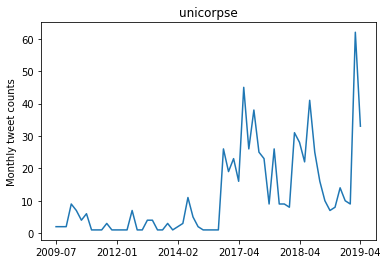

In [0]:
plot_timeseries(dataset_read['unicorpse'], 'unicorpse')

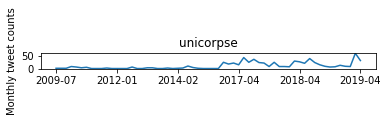

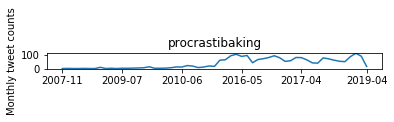

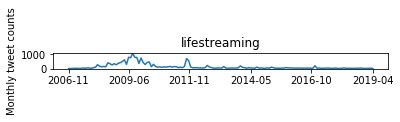

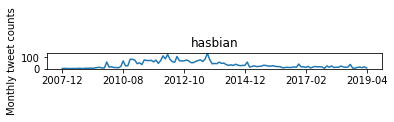

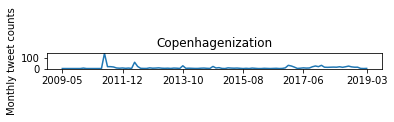

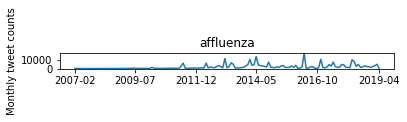

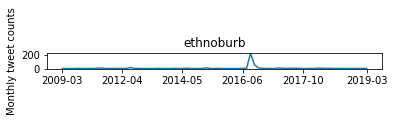

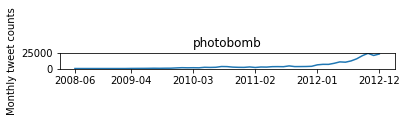

In [0]:
plot_ls = ['unicorpse', 'procrastibaking', 'lifestreaming','hasbian', 'Copenhagenization','affluenza', 'ethnoburb', 'photobomb']
for i, word in enumerate(plot_ls):
  plt.subplot(len(word_ls), 1, i+1)
  plot_timeseries(dataset_read[word], word)
  
  plt.show()

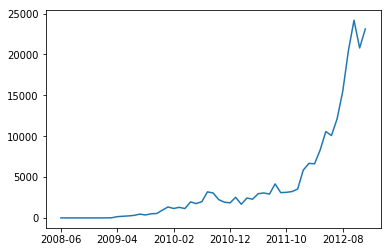

In [0]:
p = dataset_read['photobomb'].groupby('year_month').text.count()
plt.plot(p)
seq = np.arange(0,len(p.index), 10)
plt.xticks(p.index[seq])
plt.show()
#p2 = p.plot()
#p2.set(axes = p.index)#set_xticklabels(p.index)

In [0]:
seq = np.arange(0,len(p.index), 10)
p.index[seq]

Index(['2008-06', '2009-04', '2010-02', '2010-12', '2011-10', '2012-08'], dtype='object', name='year_month')

In [0]:
dataset_read['ethnoburb'].year_month.value_counts()

2016-08    226
2016-09     56
2012-10     17
2015-02     11
2016-10     10
2011-03      9
2017-04      9
2018-02      6
2014-07      6
2011-04      6
2017-07      5
2017-09      5
2017-08      5
2017-05      5
2018-03      4
2018-05      4
2016-11      4
2015-05      3
2012-11      3
2018-12      3
2013-12      3
2010-08      3
2012-12      3
2012-02      3
2018-04      3
2019-03      3
2013-06      3
2017-12      3
2016-06      3
2012-04      3
          ... 
2014-03      2
2018-10      2
2018-08      2
2013-04      1
2017-10      1
2013-08      1
2013-09      1
2014-09      1
2010-09      1
2013-03      1
2015-08      1
2017-03      1
2011-01      1
2018-01      1
2013-01      1
2016-07      1
2009-11      1
2009-08      1
2017-11      1
2016-01      1
2015-07      1
2009-09      1
2013-02      1
2015-04      1
2015-09      1
2015-10      1
2014-05      1
2013-11      1
2014-10      1
2018-09      1
Name: year_month, Length: 77, dtype: int64